In [27]:
!pip install keras==3.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 18.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


In [31]:
import requests
import json

# Function to fetch one-minute interval cryptocurrency data
def get_cryptocurrency_data(symbol, interval='1m', limit=10):
    url = f'https://api.binance.us/api/v1/klines?symbol={symbol}&interval={interval}&limit={limit}'
    response = requests.get(url)
    if response.status_code == 200:
        data = json.loads(response.text)
        return data
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        return None

# Example usage
symbol = 'BTCUSDT'  # Example: Bitcoin/USDT pair
data = get_cryptocurrency_data(symbol)
if data:
    print("One-minute interval cryptocurrency data:")
    print(data)

One-minute interval cryptocurrency data:
[[1711589640000, '69310.34000000', '69401.28000000', '69310.34000000', '69401.27000000', '0.16863000', 1711589699999, '11696.56085890', 11, '0.16850000', '11687.55051470', '0'], [1711589700000, '69439.99000000', '69480.82000000', '69318.84000000', '69471.60000000', '0.08231000', 1711589759999, '5715.56100330', 24, '0.07513000', '5217.77978200', '0'], [1711589760000, '69471.60000000', '69532.19000000', '69459.90000000', '69459.90000000', '0.02537000', 1711589819999, '1762.92724810', 10, '0.02460000', '1709.44312510', '0'], [1711589820000, '69459.90000000', '69459.90000000', '69459.90000000', '69459.90000000', '0.00000000', 1711589879999, '0.00000000', 0, '0.00000000', '0.00000000', '0'], [1711589880000, '69529.59000000', '69529.60000000', '69459.90000000', '69459.90000000', '0.01276000', 1711589939999, '886.51951470', 3, '0.00303000', '210.67468770', '0'], [1711589940000, '69529.40000000', '69529.60000000', '69459.90000000', '69529.15000000', '0.

In [23]:
import requests
import json
from datetime import datetime, timedelta

def get_historical_data(symbol, interval='1m', limit=1440):
    base_url = 'https://api.binance.us/api/v1/klines'
    end_time = datetime.now()
    start_time = end_time - timedelta(days=365)
    start_timestamp = int(start_time.timestamp()) * 1000
    end_timestamp = int(end_time.timestamp()) * 1000
    url = f'{base_url}?symbol={symbol}&interval={interval}&startTime={start_timestamp}&endTime={end_timestamp}&limit={limit}'
    response = requests.get(url)
    if response.status_code == 200:
        data = json.loads(response.text)
        return data
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        return None

symbol = 'BTCUSDT'
data = get_historical_data(symbol)
if data:
    print("Historical data for BTC/USDT:")
    print(data)

Historical data for BTC/USDT:
[[1680052320000, '27319.32000000', '27322.45000000', '27312.13000000', '27318.07000000', '0.19406000', 1680052379999, '5300.82663390', 14, '0.10779000', '2944.59224200', '0'], [1680052380000, '27314.94000000', '27334.61000000', '27306.54000000', '27334.61000000', '1.92834000', 1680052439999, '52681.58034720', 54, '1.64207000', '44862.42344170', '0'], [1680052440000, '27329.06000000', '27346.28000000', '27329.06000000', '27338.35000000', '2.35013000', 1680052499999, '64243.51452220', 74, '0.69436000', '18984.14851420', '0'], [1680052500000, '27338.92000000', '27375.56000000', '27330.95000000', '27350.62000000', '2.36933000', 1680052559999, '64823.79626700', 77, '0.55749000', '15254.18008220', '0'], [1680052560000, '27352.15000000', '27373.72000000', '27341.29000000', '27368.24000000', '3.10276000', 1680052619999, '84883.73680130', 85, '2.53894000', '69457.63352490', '0'], [1680052620000, '27356.34000000', '27400.00000000', '27356.34000000', '27400.00000000'

In [30]:
from datetime import datetime
import requests
import json
from datetime import datetime, timedelta
import csv
def extract_data(data):
    extracted_data = []
    for candlestick in data:
        start_time_ms = candlestick[0]
        opening_price = candlestick[1]
        highest_price = candlestick[2]
        lowest_price = candlestick[3]
        closing_price = candlestick[4]
        volume = candlestick[5]
        end_time_ms = candlestick[6]

        # Convert Unix timestamps to datetime objects
        start_time = datetime.utcfromtimestamp(start_time_ms / 1000)
        end_time = datetime.utcfromtimestamp(end_time_ms / 1000)

        extracted_data.append([start_time, opening_price, highest_price, lowest_price, closing_price, volume, end_time])
    return extracted_data
def get_historical_data(symbol, interval='1m', limit=1440):
    base_url = 'https://api.binance.us/api/v1/klines'
    end_time = datetime.now()
    start_time = end_time - timedelta(days=1)
    start_timestamp = int(start_time.timestamp()) * 1000
    end_timestamp = int(end_time.timestamp()) * 1000
    url = f'{base_url}?symbol={symbol}&interval={interval}&startTime={start_timestamp}&endTime={end_timestamp}&limit={limit}'
    response = requests.get(url)
    if response.status_code == 200:
        data = json.loads(response.text)
        return data
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        return None
def write_to_csv(data, filename):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["start_interval_Timestamp", "Opening", "Highest", "Lowest", "Closing", "Volume", "end_interval_Timestamp"])
        writer.writerows(data)
symbol = 'BTCUSDT'
data = get_historical_data(symbol)  # Assuming you already have the historical data
print(data)
# Extract required fields with datetime conversion
extracted_data = extract_data(data)

# Write extracted data to CSVcs
write_to_csv(extracted_data, 'cryptocurrency_data_11day.csv')

[[1711502640000, '70587.48000000', '70587.48000000', '70538.90000000', '70538.90000000', '0.29616000', 1711502699999, '20904.21372190', 8, '0.00067000', '47.29361160', '0'], [1711502700000, '70512.71000000', '70512.71000000', '70512.71000000', '70512.71000000', '0.00002000', 1711502759999, '1.41025420', 1, '0.00000000', '0.00000000', '0'], [1711502760000, '70512.72000000', '70512.72000000', '70512.72000000', '70512.72000000', '0.00009000', 1711502819999, '6.34614480', 1, '0.00000000', '0.00000000', '0'], [1711502820000, '70512.71000000', '70512.71000000', '70435.75000000', '70435.75000000', '0.00536000', 1711502879999, '377.73507420', 10, '0.00193000', '135.94099750', '0'], [1711502880000, '70478.80000000', '70478.80000000', '70434.28000000', '70478.80000000', '0.01929000', 1711502939999, '1359.52358640', 5, '0.01901000', '1339.80198800', '0'], [1711502940000, '70525.92000000', '70525.93000000', '70442.14000000', '70442.14000000', '0.00442000', 1711502999999, '311.38945180', 4, '0.0004

In [2]:
import requests
import json
from datetime import datetime, timedelta

def get_historical_data(symbol, interval='1d', limit=720):
    base_url = 'https://api.binance.us/api/v1/klines'
    end_time = datetime.now()
    start_time = end_time - timedelta(days=365)
    start_timestamp = int(start_time.timestamp()) * 1000
    end_timestamp = int(end_time.timestamp()) * 1000
    url = f'{base_url}?symbol={symbol}&interval={interval}&startTime={start_timestamp}&endTime={end_timestamp}&limit={limit}'
    response = requests.get(url)
    if response.status_code == 200:
        data = json.loads(response.text)
        return data
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        return None

symbol = 'BTCUSDT'
data = get_historical_data(symbol)
if data:
    print("Historical data for BTC/USDT:")
    print(data)

Historical data for BTC/USDT:
[[1680134400000, '28341.68000000', '29182.00000000', '27697.25000000', '28035.67000000', '4685.15013200', 1680220799999, '132982573.32361994', 79640, '2310.41690200', '65591187.91840794', '0'], [1680220800000, '28033.22000000', '28657.69000000', '27510.35000000', '28460.08000000', '3264.42222000', 1680307199999, '92087190.17915310', 67046, '1653.88158000', '46655314.87378960', '0'], [1680307200000, '28460.10000000', '28815.32000000', '28218.91000000', '28452.75000000', '913.66801000', 1680393599999, '26011210.75902080', 21547, '467.83846000', '13319717.48378440', '0'], [1680393600000, '28449.00000000', '28530.76000000', '27854.49000000', '28176.40000000', '1189.99710000', 1680479999999, '33537691.69689880', 23290, '595.05282000', '16770796.70292270', '0'], [1680480000000, '28177.46000000', '28500.29000000', '27265.00000000', '27806.67000000', '3575.72719000', 1680566399999, '100179420.21972340', 67011, '1813.07087000', '50798338.38825730', '0'], [168056640

In [26]:
from datetime import datetime
import requests
import json
from datetime import datetime, timedelta
import csv
def extract_data(data):
    extracted_data = []
    for candlestick in data:
        start_time_ms = candlestick[0]
        opening_price = candlestick[1]
        highest_price = candlestick[2]
        lowest_price = candlestick[3]
        closing_price = candlestick[4]
        volume = candlestick[5]
        end_time_ms = candlestick[6]

        # Convert Unix timestamps to datetime objects
        start_time = datetime.utcfromtimestamp(start_time_ms / 1000)
        end_time = datetime.utcfromtimestamp(end_time_ms / 1000)

        extracted_data.append([start_time, opening_price, highest_price, lowest_price, closing_price, volume, end_time])
    return extracted_data
def get_historical_data(symbol, interval='1m', limit=720):
    base_url = 'https://api.binance.us/api/v1/klines'
    end_time = datetime.now()
    start_time = end_time - timedelta(days=720)
    start_timestamp = int(start_time.timestamp()) * 1000
    end_timestamp = int(end_time.timestamp()) * 1000
    url = f'https://api.binance.us/api/v1/klines?symbol={symbol}&interval={interval}&limit={limit}'
    response = requests.get(url)
    if response.status_code == 200:
        data = json.loads(response.text)
        return data
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        return None
def write_to_csv(data, filename):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["start_interval_Timestamp", "Opening", "Highest", "Lowest", "Closing", "Volume", "end_interval_Timestamp"])
        writer.writerows(data)
symbol = 'BTCUSDT'
data = get_historical_data(symbol)  # Assuming you already have the historical data
print(data)
# Extract required fields with datetime conversion
extracted_data = extract_data(data)

# Write extracted data to CSVcs
write_to_csv(extracted_data, 'cryptocurrency_data_day.csv')

[[1711545420000, '71364.96000000', '71364.99000000', '71217.81000000', '71290.18000000', '0.01783000', 1711545479999, '1272.29010920', 6, '0.01636000', '1167.53074770', '0'], [1711545480000, '71341.35000000', '71341.37000000', '71008.40000000', '71066.04000000', '1.05048000', 1711545539999, '74665.79952410', 47, '0.03277000', '2337.05441830', '0'], [1711545540000, '71066.16000000', '71217.07000000', '71066.15000000', '71217.07000000', '0.02323000', 1711545599999, '1650.96033310', 9, '0.00062000', '44.15458340', '0'], [1711545600000, '71212.21000000', '71353.84000000', '71101.68000000', '71353.84000000', '0.09021000', 1711545659999, '6425.07978400', 9, '0.09021000', '6425.07978400', '0'], [1711545660000, '71212.45000000', '71248.06000000', '71212.45000000', '71248.06000000', '0.00059000', 1711545719999, '42.03528710', 3, '0.00056000', '39.89891360', '0'], [1711545720000, '71174.84000000', '71174.84000000', '71174.84000000', '71174.84000000', '0.00002000', 1711545779999, '1.42349680', 1,

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('/content/cryptocurrency_data.csv')

In [6]:
print(len(df))

720


In [7]:
df

,start_interval_Timestamp,Opening,Highest,Lowest,Closing,Volume,end_interval_Timestamp
0,2022-04-09 00:00:00,42240.35,42792.28,42131.46,42776.93,35.564580,2022-04-09 23:59:59.999000
1,2022-04-10 00:00:00,42775.68,43410.43,41872.61,42082.48,62.878373,2022-04-10 23:59:59.999000
2,2022-04-11 00:00:00,42082.25,42406.01,39211.50,39530.20,160.300553,2022-04-11 23:59:59.999000
3,2022-04-12 00:00:00,39529.98,40778.42,39260.45,40103.50,176.036963,2022-04-12 23:59:59.999000
4,2022-04-13 00:00:00,40049.71,41566.78,39576.42,41133.85,181.517424,2022-04-13 23:59:59.999000
...,...,...,...,...,...,...,...
715,2024-03-24 00:00:00,64041.73,67439.74,63815.35,67173.00,39.914760,2024-03-24 23:59:59.999000
716,2024-03-25 00:00:00,67180.40,71043.93,66306.57,69853.45,123.648590,2024-03-25 23:59:59.999000
717,2024-03-26 00:00:00,69868.60,71365.19,69324.13,69983.99,56.220120,2024-03-26 23:59:59.999000
718,2024-03-27 00:00:00,69948.59,71668.99,68303.60,69437.70,69.582400,2024-03-27 23:59:59.999000


In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

from keras.initializers import GlorotUniform

#

In [17]:
import keras
print(keras.__version__)

3.1.1


In [18]:
data = pd.read_csv('cryptocurrency_data.csv')

# Extract the features (e.g., opening price) for training
training_data = data[['Closing']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(training_data)

In [19]:



# Define the number of time steps to consider (e.g., past 60 minutes)
time_steps = 60

# Prepare the training data
X_train, y_train = [], []
for i in range(time_steps, len(scaled_data)):
    X_train.append(scaled_data[i - time_steps:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data for LSTM input [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
#  Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1), kernel_initializer=GlorotUniform()))
model.add(LSTM(units=50, kernel_initializer=GlorotUniform()))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Save the trained model
model.save('cryptocurrency_lstm_model_new.keras')

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0349
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0019
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0014
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0016
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0013
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0012
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0014
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0013
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0011
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0012
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0011
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0011
Epoch 13/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0012
Epoch 14/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 9.8597e-04
Epoch 15/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0011


In [14]:
from keras.models import load_model
model=load_model("/content/cryptocurrency_lstm_model.keras")

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


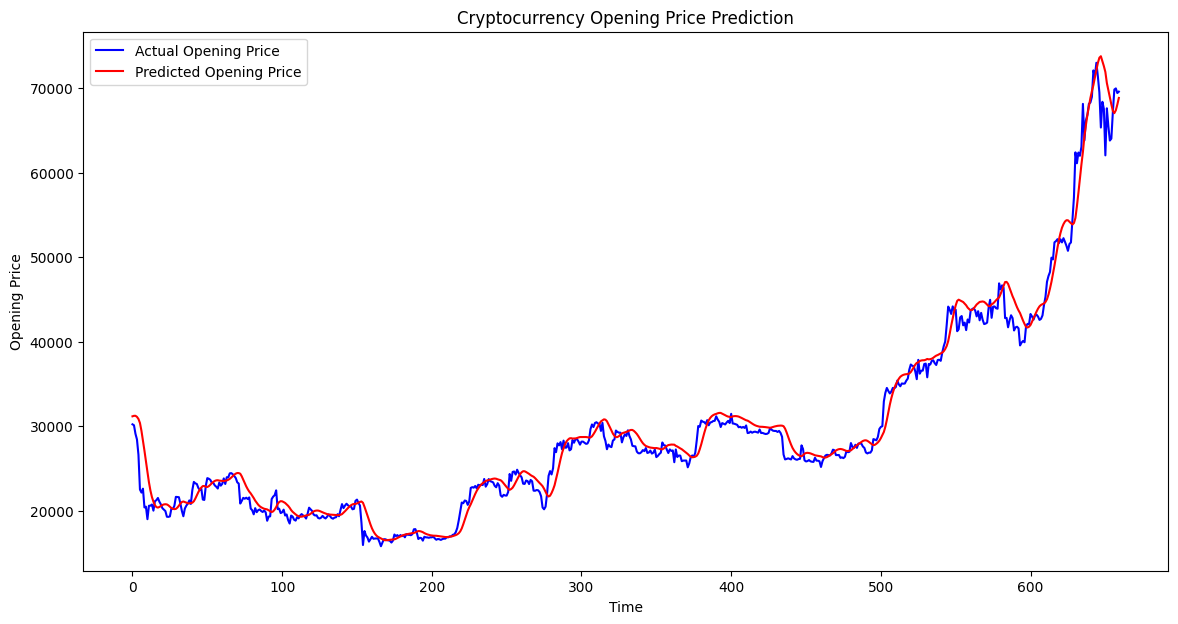

In [15]:
import matplotlib.pyplot as plt

# Load test data
test_data = pd.read_csv('/content/cryptocurrency_data.csv')

# Extract the features (e.g., opening price) for testing
test_data = test_data[['Closing']].values

# Normalize the test data using the same scaler used for training
scaled_test_data = scaler.transform(test_data)

# Prepare the test data
X_test, y_test = [], []
for i in range(time_steps, len(scaled_test_data)):
    X_test.append(scaled_test_data[i - time_steps:i, 0])
    y_test.append(scaled_test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the test data for LSTM input [samples, time steps, features]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Use the trained LSTM model to make predictions on the test data
predicted_prices = model.predict(X_test)

# Inverse transform the predicted prices to their original scale
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot the line graph
plt.figure(figsize=(14, 7))
plt.plot(test_data[time_steps:], color='blue', label='Actual Opening Price')
plt.plot(predicted_prices, color='red', label='Predicted Opening Price')
plt.title('Cryptocurrency Opening Price Prediction')
plt.xlabel('Time')
plt.ylabel('Opening Price')
plt.legend()
plt.show()

In [22]:
def predict_next_days(model, data, scaler, time_steps, num_days):
    # Copy the original data
    input_data = data.copy()

    # Initialize list to store predicted prices
    predicted_prices = []

    # Iterate over the number of days
    for _ in range(num_days):
        # Prepare the input data for prediction
        input_sequence = input_data[-time_steps:]
        input_sequence_scaled = scaler.transform(input_sequence.reshape(-1, 1))
        X_input = np.reshape(input_sequence_scaled, (1, time_steps, 1))

        # Predict the next value
        predicted_price = model.predict(X_input)

        # Inverse transform the predicted price
        predicted_price = scaler.inverse_transform(predicted_price)[0][0]

        # Append the predicted price to the list
        predicted_prices.append(predicted_price)

        # Append the predicted price to the input data and remove the oldest value
        input_data = np.append(input_data, predicted_price)
        input_data = input_data[-time_steps:]

    return predicted_prices

# Example usage:
num_days = 30  # Number of days to predict
predicted_prices_30_days = predict_next_days(model, data['Opening'].values, scaler, time_steps, num_days)
print(predicted_prices_30_days)

1/1 [==============================] - 0s 28ms/step
[69226.0, 70223.37, 71260.93, 72329.62, 73422.26, 74532.3, 75653.13, 76778.17, 77900.83, 79014.87, 80114.54, 81194.71, 82250.97, 83279.65, 84277.77, 85243.11, 86174.086, 87069.67, 87929.39, 88753.2, 89541.445, 90294.77, 91014.055, 91700.37, 92354.87, 92978.85, 93573.64, 94140.53, 94680.805, 95195.76]


In [26]:
import requests
from bs4 import BeautifulSoup

In [6]:
def oneMinuteGoldPrices():
    url='https://finance.yahoo.com/quote/GOLD?p=GOLD&.tsrc=fin-srch'
    response=requests.get(url)
    if(response.status_code==200):
        soup=BeautifulSoup(response.text,'html.parser')
        oneM=soup.find_all('fin-streamer',{'data-symbol':"GOLD"})
        oneMd=[]
        for o in oneM:
            oneMd.append(o.text)
    return oneMd[:3]

def goldScrap():
    url='https://finance.yahoo.com/quote/GOLD?p=GOLD&.tsrc=fin-srch'
    response=requests.get(url)
    if(response.status_code==200):
        soup=BeautifulSoup(response.text,'html.parser')
        tables=soup.find_all('table',{'class':'W(100%)'})
        dataList=[]
        for tab in tables:
            for data in tab.find_all('td'):
                dataList.append(data.text)
    return dataList

In [8]:
oneMinuteGoldPrices()

['15.66', '-0.20', '(-1.29%)']

In [24]:
import tensorflow
print(tensorflow.__version__)

2.15.0
